In [1811]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import statsmodels.api as sm

In [1812]:
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1813]:
bike['weathersit'].value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [1804]:
# Removing un-used/not-required features
bike = bike.drop('casual', axis=1)
bike = bike.drop('registered', axis=1)

#Removing dteday as we have already have mnth and weekday features as colums
bike = bike.drop('dteday', axis = 1)
bike = bike.drop('instant', axis = 1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


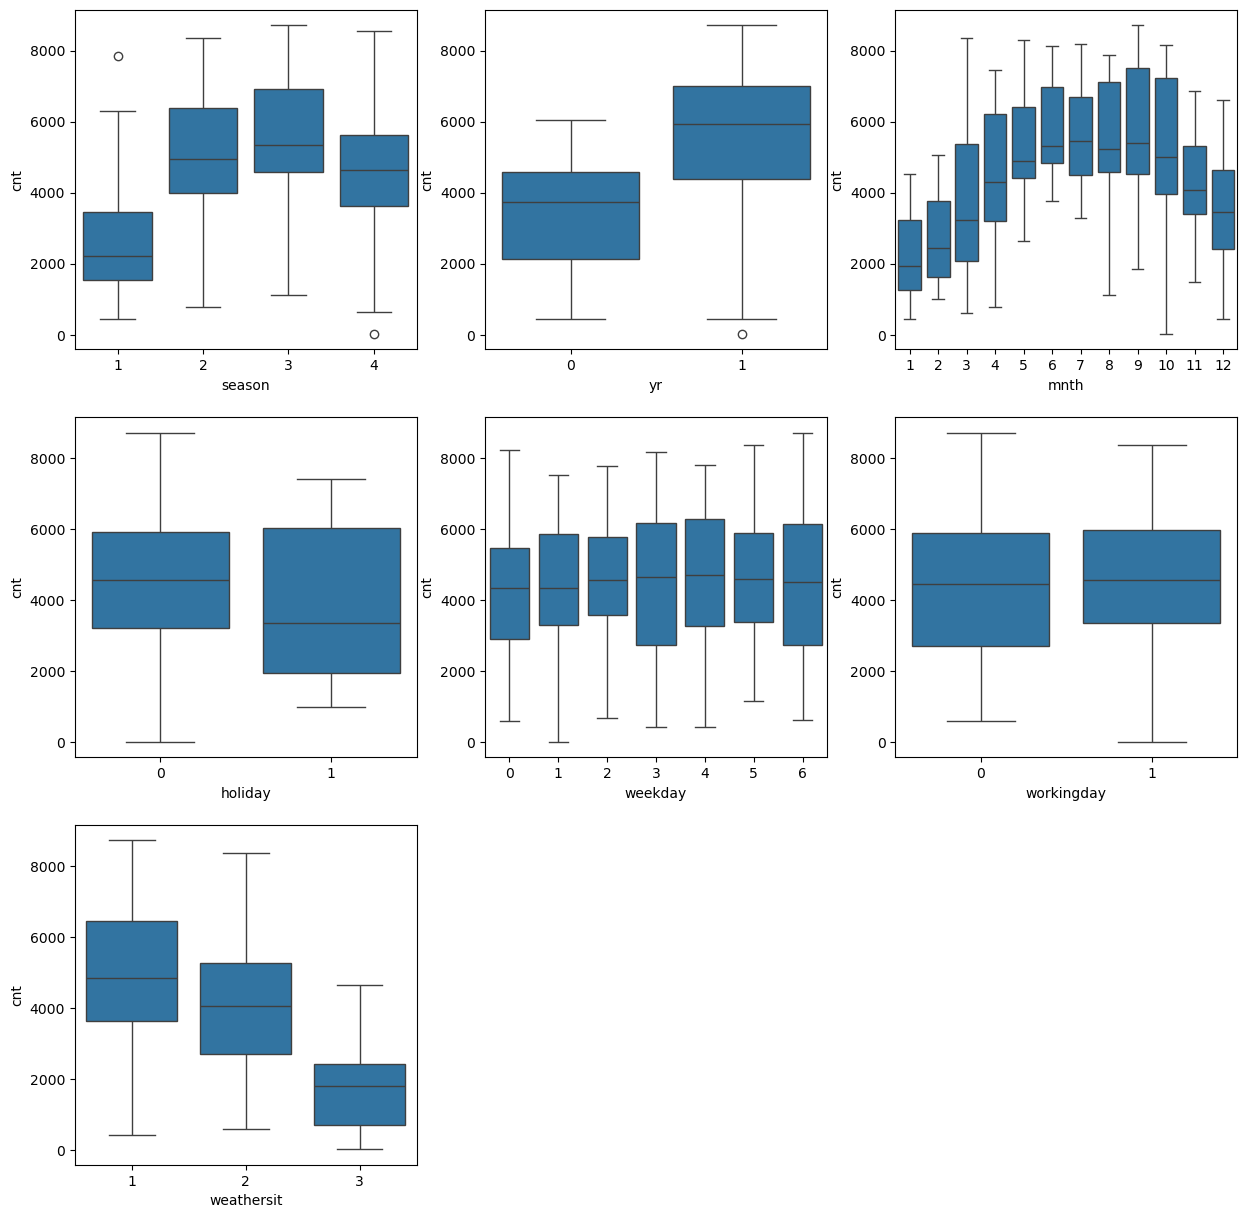

In [1805]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike, x=i[1], y='cnt')
plt.show()

In [1796]:
# Converting season and categorical variables
bike.season = bike.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

bike.weathersit = bike.weathersit.replace({1:'good',2:'moderate',3:'bad'})

bike.mnth = bike.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike.weekday = bike.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


<Figure size 1500x3000 with 0 Axes>

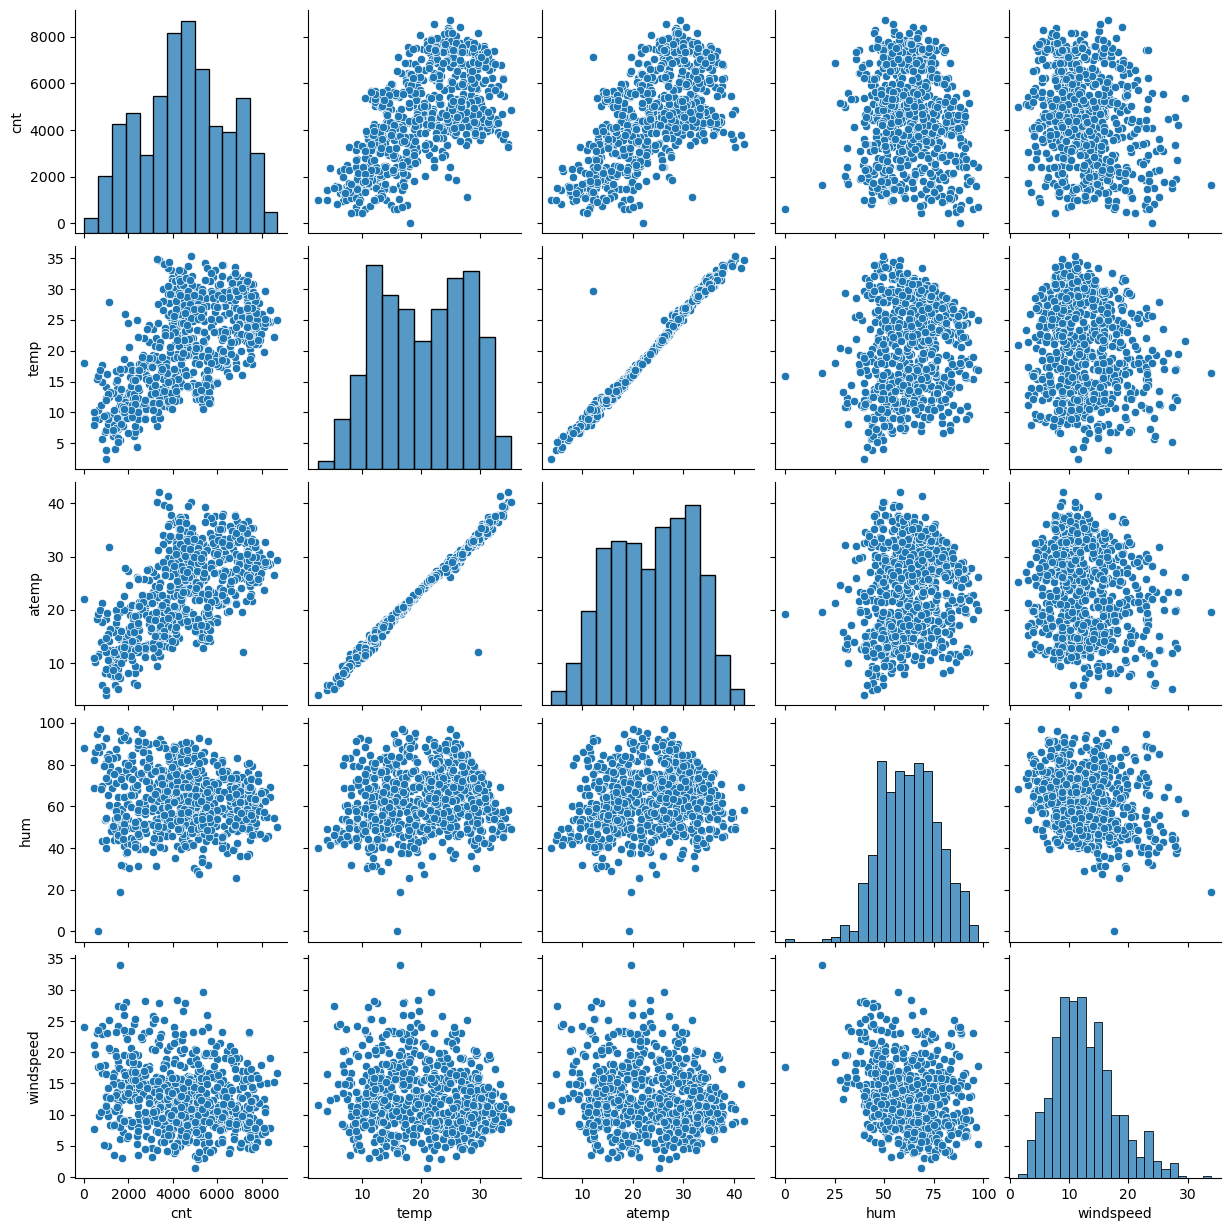

In [1797]:
#EDA
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bike,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()


In [1798]:
bike = pd.get_dummies(bike, columns=['season'], drop_first=True)
bike = pd.get_dummies(bike, columns=['weathersit'])
bike = pd.get_dummies(bike, columns=['weekday'], drop_first=True )
bike = pd.get_dummies(bike, columns=['mnth'], drop_first=True )
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,True,False,False,False,False,False,False,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,True,False,False,False,False,False,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,True,False,False,False,False,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,True,False,False,False,False,False,False,False


In [1773]:
bool_cols = bike.select_dtypes(include='bool').columns
bike[bool_cols] = bike[bool_cols].astype(int)
bike.dtypes

yr                       int64
holiday                  int64
workingday               int64
temp                   float64
atemp                  float64
hum                    float64
windspeed              float64
cnt                      int64
season_spring            int64
season_summer            int64
season_winter            int64
weathersit_bad           int64
weathersit_good          int64
weathersit_moderate      int64
weekday_mon              int64
weekday_sat              int64
weekday_sun              int64
weekday_thu              int64
weekday_tue              int64
weekday_wed              int64
mnth_aug                 int64
mnth_dec                 int64
mnth_feb                 int64
mnth_jan                 int64
mnth_jul                 int64
mnth_jun                 int64
mnth_mar                 int64
mnth_may                 int64
mnth_nov                 int64
mnth_oct                 int64
mnth_sept                int64
dtype: object

In [1774]:
bike.head()
#bike[(bike['weekday'] != 6) & (bike['workingday'] == 0)]

df_train, df_test = train_test_split(bike, train_size = 0.7, random_state=100)
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,0,0,0,0,0,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,0,0,0,0,0,0


In [1775]:
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,0


In [1776]:
df_train.shape

(510, 31)

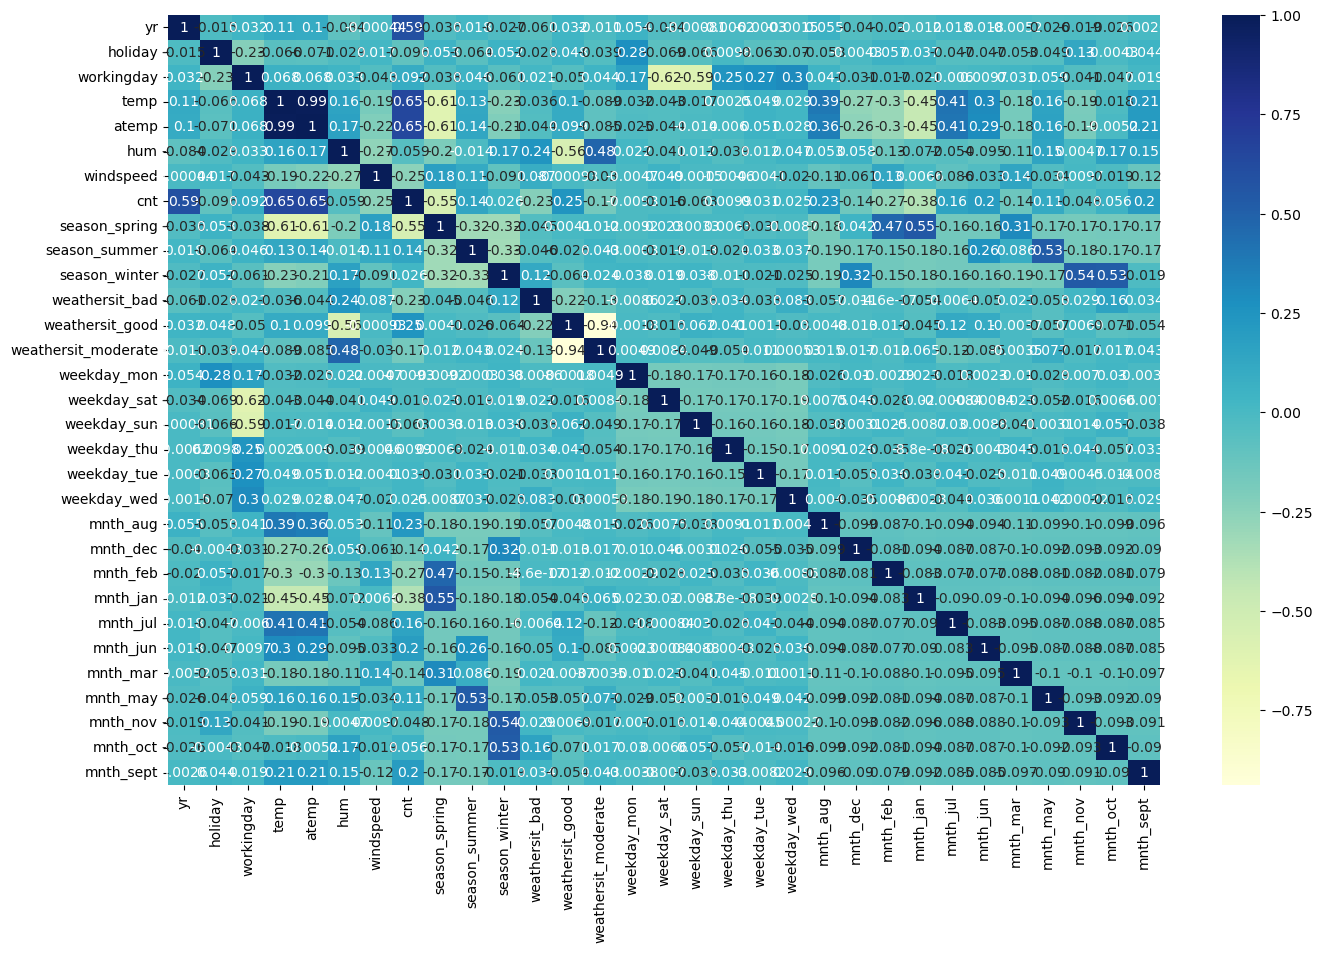

In [1777]:
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [1778]:
y_train = df_train.pop('cnt')
X_train = df_train
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [1779]:
bool_cols = bike.select_dtypes(include='bool').columns
bike[bool_cols] = bike[bool_cols].astype(int)
bike.dtypes

yr                       int64
holiday                  int64
workingday               int64
temp                   float64
atemp                  float64
hum                    float64
windspeed              float64
cnt                      int64
season_spring            int64
season_summer            int64
season_winter            int64
weathersit_bad           int64
weathersit_good          int64
weathersit_moderate      int64
weekday_mon              int64
weekday_sat              int64
weekday_sun              int64
weekday_thu              int64
weekday_tue              int64
weekday_wed              int64
mnth_aug                 int64
mnth_dec                 int64
mnth_feb                 int64
mnth_jan                 int64
mnth_jul                 int64
mnth_jun                 int64
mnth_mar                 int64
mnth_may                 int64
mnth_nov                 int64
mnth_oct                 int64
mnth_sept                int64
dtype: object

In [1780]:
#X_train_sm = X_train[[ 'yr', 'weekday', 'workingday', 'temp', 'windspeed',  'season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3']]
#X_train_sm = X_train.drop(columns=['instant', 'mnth', 'holiday', 'hum', 'atemp', 'temp', 'windspeed'])
# Iteratively remove one feature based on p-value and VIF.
dropped_columns = columns=['weekday_sun', 'atemp','weekday_thu', 'weekday_tue', 'weekday_wed', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_nov', 'mnth_jul', 'mnth_oct',  'mnth_jun', 'mnth_mar', 'mnth_may', 'weekday_mon', 'hum', 'weathersit_good', 'mnth_jan', 'holiday', 'season_spring' ]
X_train_sm = sm.add_constant(X_train.drop(columns=dropped_columns))
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          3.13e-188
Time:                        11:31:59   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0750      0.019      4.031      0.000       0.038       0.112
yr                      0.2331      0.008     28.370      0.000       0.217       0.249
workingday              0.0561      0.011      5.024      0.000       0.034       0.078
temp                    0.5499      0.020     27.861      0.000       0.511       0.589
windspeed              -0.1552      0.025     -6.195      0.000      -0.204      -0.106
season_summer           0.0886      0.010      8.608      0.000       0.068       0.109
season_winter           0.1307      0.010     12.600      0.000       0.110       0.151
weathersit_bad         -0.2871      0.025    -11.611      0.000      -0.336      -0.239
weathersit_moderate    -0.0800      0.009     -9.143      0.000      -0.097      -0.063
weekday_sat             0.0675      0.014      4.693      0.000       0.039       0.096
mnth_sept               0.0974      0.016      6.184      0.000       0.066       0.128
==============================================================================
Omnibus:                       68.639   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.839
Skew:                          -0.731   Prob(JB):                     1.07e-33
Kurtosis:                       5.238   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1781]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range (X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,20.86
2,workingday,1.65
9,weekday_sat,1.63
6,season_winter,1.21
3,temp,1.20
5,season_summer,1.19
10,mnth_sept,1.10
4,windspeed,1.09
7,weathersit_bad,1.05
8,weathersit_moderate,1.04


In [1782]:
y_train_pred = lr_model.predict(X_train_sm)

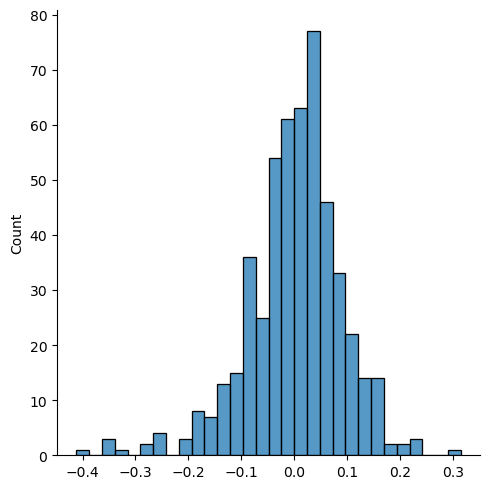

In [1783]:
sns.displot(y_train - y_train_pred)

In [1784]:
#features = ['season', 'yr', 'weekday', 'workingday', 'weathersit', 'atemp', 'windspeed']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])# df_test.head()
df_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,0.503971,0.508864,0.667633,0.383644,0.775082,0,0,...,1,0,0,0,0,0,0,0,0,0
127,0,0,0,0.573725,0.577423,0.525522,0.132095,0.489314,0,1,...,0,0,0,0,0,0,1,0,0,0
640,1,0,1,0.745342,0.687659,0.751160,0.111637,0.896530,0,0,...,0,0,0,0,0,0,0,0,1,0
72,0,0,1,0.303855,0.320482,0.337991,0.289582,0.201785,1,0,...,0,0,0,0,0,1,0,0,0,0


In [1785]:
y_test = df_test.pop('cnt')
X_test = df_test

In [1786]:
X_test_sm = sm.add_constant(X_test.drop(columns=  dropped_columns))
#X_test_sm = X_test[['yr', 'weekday', 'workingday', 'season_2', ))
#X_test_sm = X_test[['yr', 'weekday', 'workingday', 'season_2', 'season_3', 'season_4', 'weathersit_2', 'weathersit_3']]
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred

184    0.432194
535    0.918197
299    0.385811
221    0.550948
152    0.565707
         ...   
702    0.712508
127    0.458616
640    0.807431
72     0.253271
653    0.703853
Length: 220, dtype: float64

In [1787]:
y_test

184    0.704300
535    0.725421
299    0.278853
221    0.545512
152    0.569148
         ...   
702    0.775082
127    0.489314
640    0.896530
72     0.201785
653    0.891753
Name: cnt, Length: 220, dtype: float64

In [1788]:
r2_score(y_test, y_test_pred)

0.7875368822303461

In [1817]:
y_test_pred.shape

(220,)

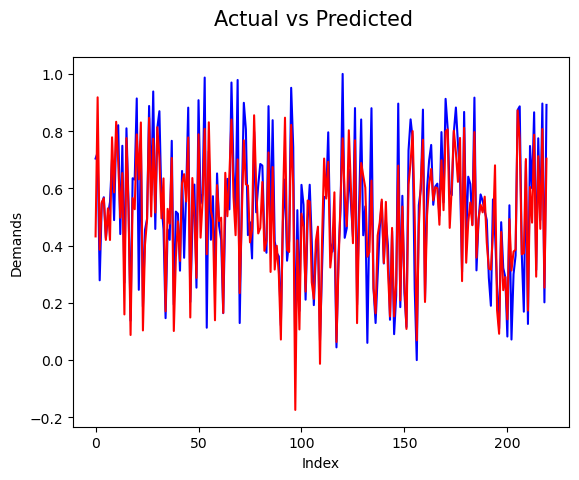

In [1818]:
c = [i for i in range(0,len(y_test),1)]
plt.plot(c,y_test, color="blue")
plt.plot(c,y_test_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

### Significant variables to predict the demand for shared bikes 

#####  Positive Linear Relationship features
*  temp
*  year
*  season_winter
*  September month
*  winter and summer season

##### Negative Linear Relationship features
* windspeed
* bad weather
